### PGA 23
### PRIYA SHARMA
### Unsupervised ML

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df1=df.copy()

In [7]:
df1.drop(columns=["CUST_ID"],inplace=True)

In [8]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [9]:
df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
cat_cols=["BALANCE_FREQUENCY","PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"]

In [12]:
for i in cat_cols:
    x=df1[i].value_counts()
    print(f"\n\nValue counts of: {i}\n",x)



Value counts of: BALANCE_FREQUENCY
 1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.166667       7
0.600000       6
0.222222       5
0.428571       5
0.111111       5
Name: BALANCE_FREQUENCY, dtype: int64


Value counts of: PURCHASES_FREQUENCY
 1.000000    2178
0.000000    2043
0.083333     677
0.916667     396
0.500000     395
0.166667     392
0.833333     373
0.333333     367
0.250000     345


In [13]:
df1['BALANCE_FREQUENCY'] = np.where(df1['BALANCE_FREQUENCY'] <= 0.5, 0, 1)
df1['BALANCE_FREQUENCY'].value_counts()

1    7996
0     954
Name: BALANCE_FREQUENCY, dtype: int64

In [14]:
df1['BALANCE_FREQUENCY'].value_counts()

1    7996
0     954
Name: BALANCE_FREQUENCY, dtype: int64

In [15]:
df1['PURCHASES_FREQUENCY'] = np.where(df1['PURCHASES_FREQUENCY'] <= 0.5, 0, 1)
df1['PURCHASES_FREQUENCY'].value_counts()

0    4803
1    4147
Name: PURCHASES_FREQUENCY, dtype: int64

In [16]:
df1['ONEOFF_PURCHASES_FREQUENCY'] = np.where(df1['ONEOFF_PURCHASES_FREQUENCY'] <= 0.5, 0, 1)
df1['ONEOFF_PURCHASES_FREQUENCY'].value_counts()

0    7607
1    1343
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

In [17]:
df1['PURCHASES_INSTALLMENTS_FREQUENCY'] = np.where(df1['PURCHASES_INSTALLMENTS_FREQUENCY'] <= 0.5, 0, 1)
df1['PURCHASES_INSTALLMENTS_FREQUENCY'].value_counts()

0    5860
1    3090
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

In [18]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,1,95.40,0.00,95.4,0.000000,0,0,0,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,1,0.00,0.00,0.0,6442.945483,0,0,0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1,773.17,773.17,0.0,0.000000,1,1,0,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,1,1499.00,1499.00,0.0,205.788017,0,0,0,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1,16.00,16.00,0.0,0.000000,0,0,0,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
for i in cat_cols:
    x=df1[i].value_counts()
    print(f"\n\nValue counts of: {i}\n",x)



Value counts of: BALANCE_FREQUENCY
 1    7996
0     954
Name: BALANCE_FREQUENCY, dtype: int64


Value counts of: PURCHASES_FREQUENCY
 0    4803
1    4147
Name: PURCHASES_FREQUENCY, dtype: int64


Value counts of: ONEOFF_PURCHASES_FREQUENCY
 0    7607
1    1343
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64


Value counts of: PURCHASES_INSTALLMENTS_FREQUENCY
 0    5860
1    3090
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64


In [20]:
print(7996/8950)
print(954/8950)

print(4803/8950)
print(4147/8950)

print(7607/8950)
print(1343/8950)

print(5860/8950)
print(3090/8950)

0.8934078212290503
0.10659217877094972
0.5366480446927374
0.4633519553072626
0.8499441340782123
0.1500558659217877
0.6547486033519553
0.3452513966480447


## Univariate Analysis on Categorical Variables

* 1) BALANCEFREQUENCY : 1 = frequently updated, 0 = not frequently updated)
* 1.a. There are 89% people who frequently update the balance and 10% are the ones who do not.






* 2) PURCHASESFREQUENCY : 1 = frequently purchased, 0 = not frequently purchased
* 2.a. There is almost a balance between the ones who frequenctly purchase and the ones who do not frequently purchase, althought the ones who do not frequently purchase are in majority with 53%.







* 3) ONEOFFPURCHASESFREQUENCY : 1 = frequently purchased, 0 = not frequently purchased
* 3.a. Only 15% of purchases are being done in one go as we can see from the graph.






* 4) PURCHASESINSTALLMENTSFREQUENCY : 1 = frequently done, 0 = not frequently done
* 4.a. Only 34% of purchases are being done in installment.

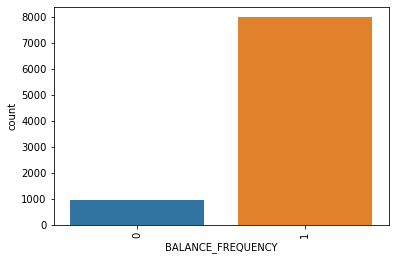

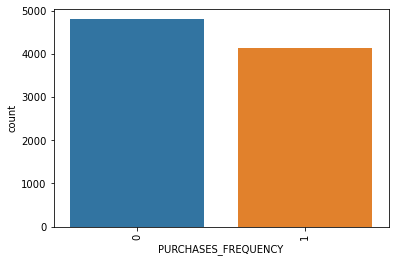

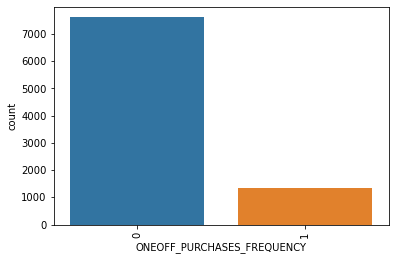

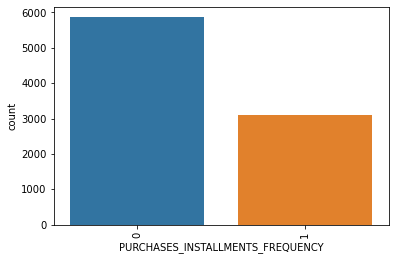

In [21]:
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.xticks(rotation=90)
    plt.show()

### Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis<br>
b. Outlier Treatment<br>
c. Deal with correlated variables<br>

### Missing Value Treatment

In [21]:
df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [22]:
df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].median(),inplace=True)
df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].median(),inplace=True)

In [23]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Outlier Treatment

In [24]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
num_cols=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

### `There are Outliers(mostly on the upper bound) in all the columns mentioned in num_cols`

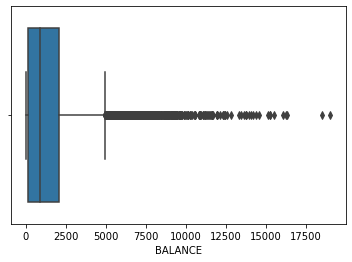

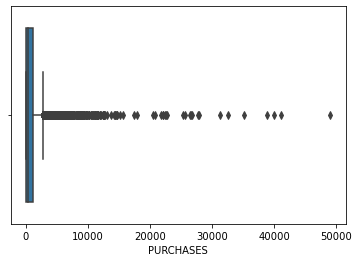

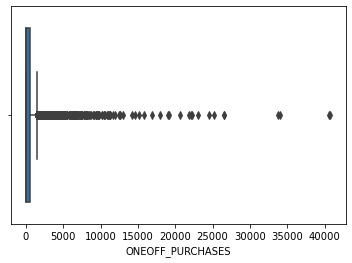

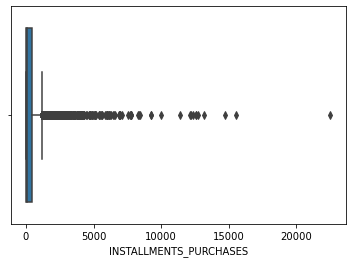

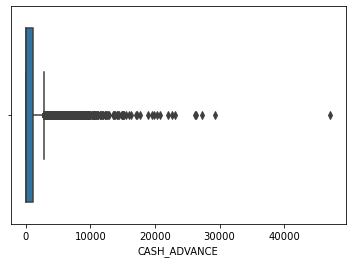

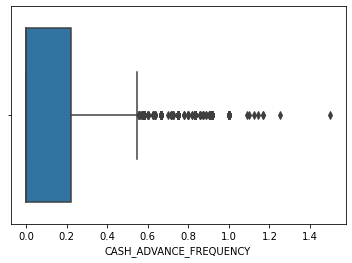

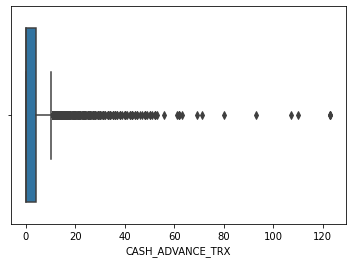

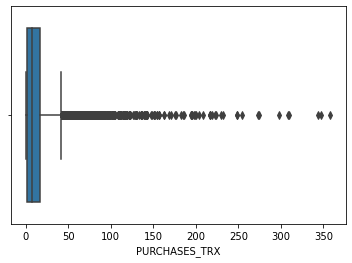

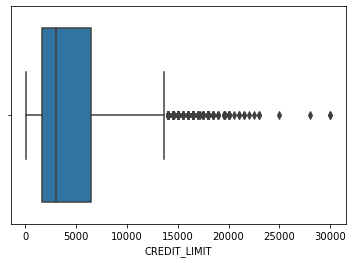

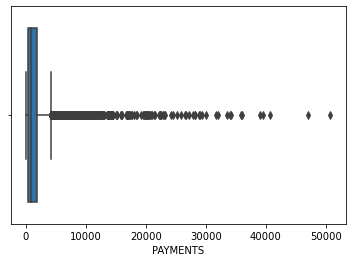

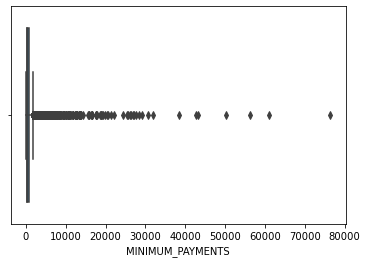

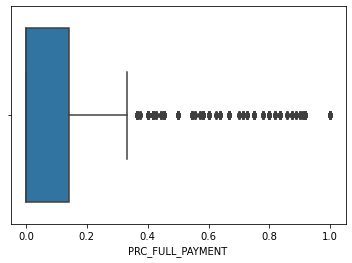

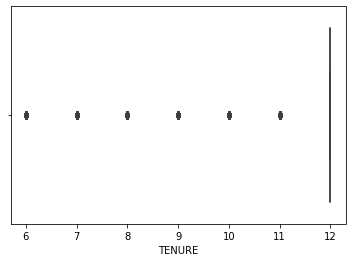

In [26]:
for i in num_cols:
    sns.boxplot(x=df1[i])
    plt.show()

In [27]:
colsForOutliers=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [31]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.89))
    x=x.clip(lower=x.quantile(0.1))
    return x

In [32]:
df1[colsForOutliers]=df1[colsForOutliers].apply(outliers_treatment)

### `We've removed maximum number of outliers by keeping the upper bound as 0.89 and lower as 0.1`

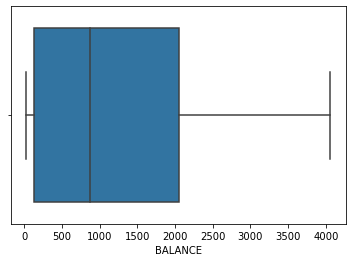

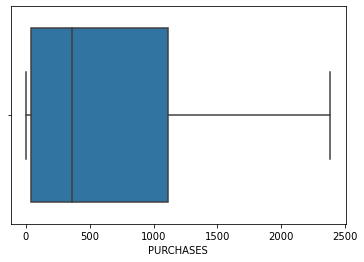

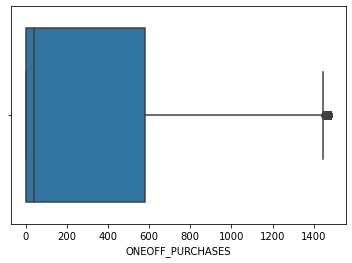

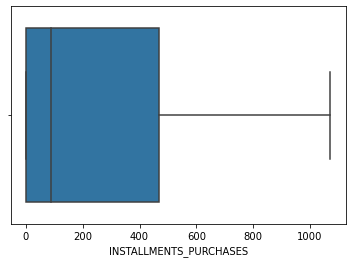

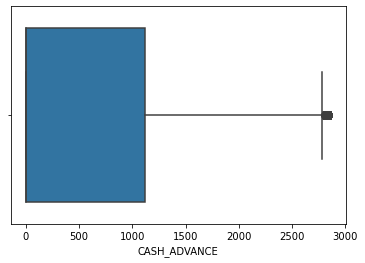

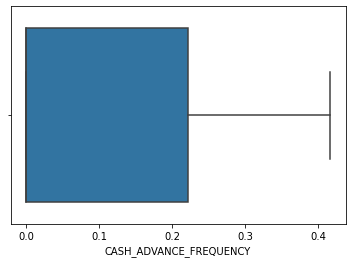

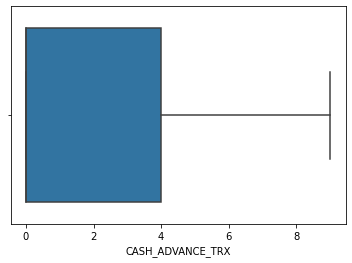

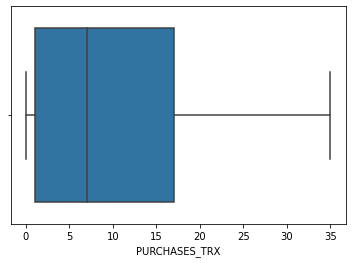

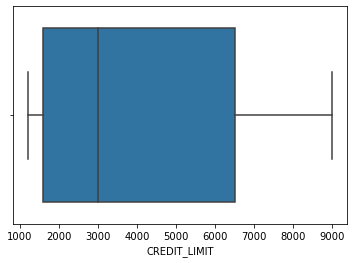

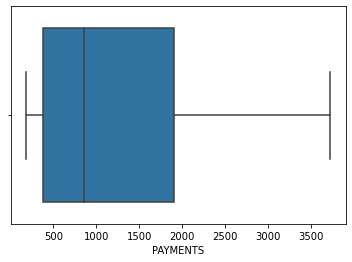

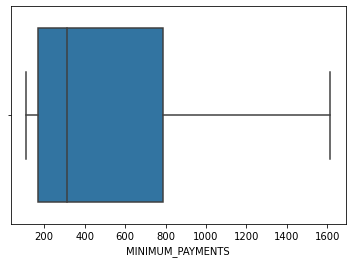

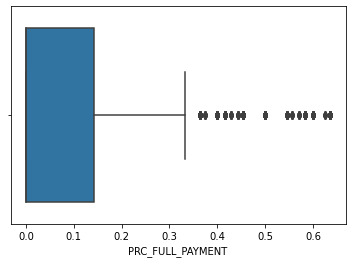

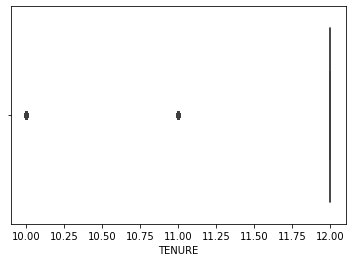

In [33]:
for i in num_cols:
    sns.boxplot(x=df1[i])
    plt.show()

### Correlated Variables

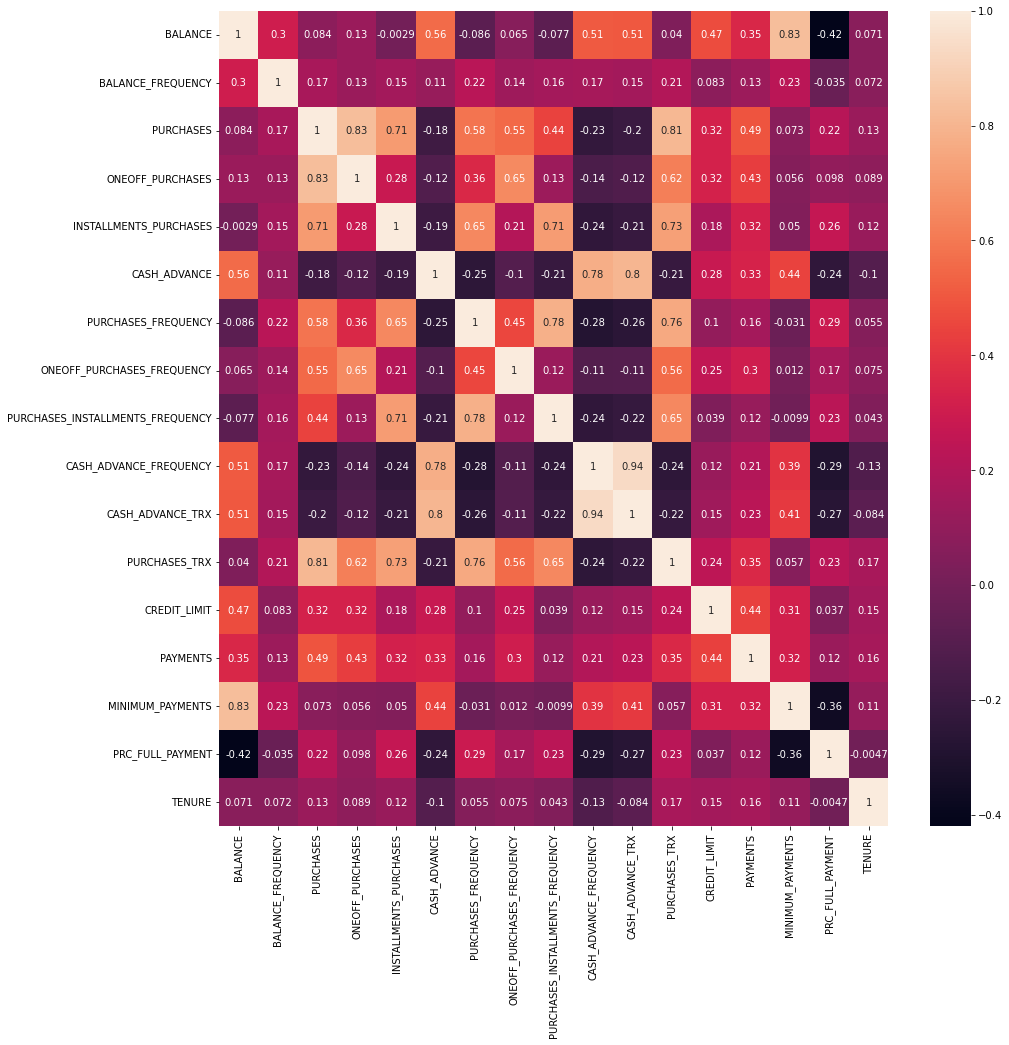

In [34]:
corr=df1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

### Dropping columns with high correlation 

In [35]:
def high_corr_feat(corr,thresh):
    corr = df1.corr()
    res = []
    for i in range(len(corr.columns)): 
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    
feat_to_drop = high_corr_feat(corr,0.7)
print(feat_to_drop)

['CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'MINIMUM_PAYMENTS', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES']


In [36]:
df1.drop(columns=['CASH_ADVANCE_TRX','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE'],inplace=True)

In [52]:
df1.drop(columns=['PRC_FULL_PAYMENT'],inplace=True)

### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained.

#### Applying PCA 

In [53]:
from sklearn.decomposition import PCA

In [54]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,1,95.40,0.000000,95.4,0,0,0,2.0,1200.0,201.802084,139.509787,12.0
1,3202.467416,1,0.00,0.000000,0.0,0,0,0,0.0,7000.0,3725.907756,1072.340217,12.0
2,2495.148862,1,773.17,773.170000,0.0,1,1,0,12.0,7500.0,622.066742,627.284787,12.0
3,1666.670542,1,1499.00,1480.684652,0.0,0,0,0,1.0,7500.0,179.617069,312.343947,12.0
4,817.714335,1,16.00,16.000000,0.0,0,0,0,1.0,1200.0,678.334763,244.791237,12.0


In [55]:
x = df1.drop('PURCHASES',axis=1)
y = df1['PURCHASES']
print(x.shape)
print(y.shape)

(8950, 12)
(8950,)


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6712, 12)
(2238, 12)
(6712,)
(2238,)


#### Applying Standardization

In [57]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train) 
x_test_sc = sc.transform(x_test) 

#### We're trying to explain 95% variance through PCA

In [58]:
pca = PCA(n_components=0.95)
pc_x_train = pca.fit_transform(x_train_sc)
pc_x_test = pca.transform(x_test_sc)
print(pc_x_train.shape)
print(pc_x_test.shape)

(6712, 9)
(2238, 9)


In [59]:
eig_val = pd.DataFrame({'Var':pca.explained_variance_})
eig_val.head()

,Var
0,4.050004
1,2.416801
2,1.372857
3,0.998194
4,0.905255


In [60]:
pc_train = pd.DataFrame(pc_x_train)
print(pc_train.shape)
pc_train.head()

(6712, 9)


,0,1,2,3,4,5,6,7,8
0,2.423534,2.644558,1.246932,0.793064,-0.493245,-1.726905,-1.109835,-0.725917,-0.176564
1,-1.986600,0.106960,-0.157597,-0.049397,-1.019276,-0.015773,0.300753,0.019715,-0.144425
2,-1.865637,0.209023,0.017177,-0.212248,-0.834822,0.271006,-0.329645,0.008857,-0.130101
3,0.672885,-1.964007,-1.446109,-0.546572,-0.182813,0.598963,0.236783,-0.382325,-0.222369
4,2.430569,-0.715024,2.997178,0.571024,-1.202092,-0.335367,0.094706,-0.095023,0.201605


In [61]:
pc_test = pd.DataFrame(pc_x_test)
print(pc_test.shape)
pc_test.head()

(2238, 9)


,0,1,2,3,4,5,6,7,8
0,-2.385436,-0.615653,1.379812,-0.671533,2.521134,-0.393110,-1.241937,-0.094376,-0.119673
1,-0.160208,-0.524763,0.219334,-0.025332,-0.822281,0.185885,0.590911,-0.239903,0.621153
2,0.422311,-2.159225,-1.175952,-0.168339,-0.666598,-0.215880,-0.256183,-0.291041,0.448882
3,1.942224,-0.923794,2.615359,1.027971,-1.678929,-1.213456,0.508632,0.180231,0.156785
4,4.041864,-0.299078,0.006641,-0.849995,0.818095,1.341211,0.610954,1.261203,0.709711


In [62]:
print(pc_train.shape)
print(pc_test.shape)
print(y_train.shape)
print(y_test.shape)

(6712, 9)
(2238, 9)
(6712,)
(2238,)


In [63]:
master_df=pc_train.append(pc_test)
print(master_df.shape)
master_df.head()

(8950, 9)


,0,1,2,3,4,5,6,7,8
0,2.423534,2.644558,1.246932,0.793064,-0.493245,-1.726905,-1.109835,-0.725917,-0.176564
1,-1.986600,0.106960,-0.157597,-0.049397,-1.019276,-0.015773,0.300753,0.019715,-0.144425
2,-1.865637,0.209023,0.017177,-0.212248,-0.834822,0.271006,-0.329645,0.008857,-0.130101
3,0.672885,-1.964007,-1.446109,-0.546572,-0.182813,0.598963,0.236783,-0.382325,-0.222369
4,2.430569,-0.715024,2.997178,0.571024,-1.202092,-0.335367,0.094706,-0.095023,0.201605


### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve.

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Identifying clusters through Elbow Plot
#### Insights
* We can see that the Elbow bend is at 5.0, which means 5.0 or values around it are our ideal number of clusters as per the plot.

WCSS
 [103526.09679544155, 75958.40345887076, 63282.95652374087, 53708.60931053227, 46390.372304377335, 41864.764659399836, 37773.62512312804, 35093.962255541504, 33357.2526603283, 31851.662629092545, 30199.447943586205, 28714.89962283319, 27559.494296948127, 26299.805061362924, 25480.720038361687, 24367.37119667711, 23689.23262380049, 22792.51629277101, 22294.948117494958]


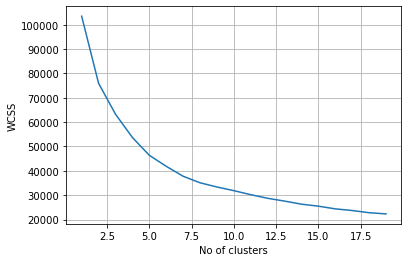

In [66]:
wcss = []
for i in range(1,20): 
    m = KMeans(n_clusters=i)
    m.fit(master_df)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot.

#### As per the below Silhouette Scores, 8 is our ideal number of clusters since Silhouette Score is maximum at 8.

In [67]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i).fit(master_df)
    print(f'Silhoutte Score at K={i}',silhouette_score(master_df,m.labels_))

Silhoutte Score at K=2 0.2747928723381309
Silhoutte Score at K=3 0.27704891374605123
Silhoutte Score at K=4 0.2708938512762292
Silhoutte Score at K=5 0.30095019634770526
Silhoutte Score at K=6 0.30587506921621715
Silhoutte Score at K=7 0.3087483166240774
Silhoutte Score at K=8 0.31910273229556085
Silhoutte Score at K=9 0.2986891791212744


In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

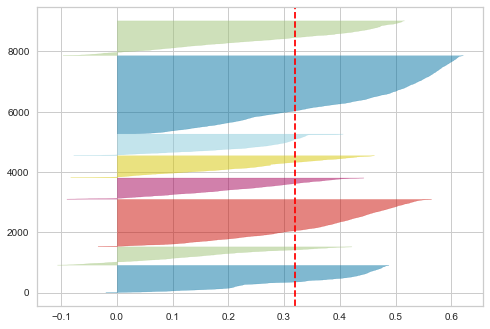

In [70]:
model1 = KMeans(n_clusters=8)
visualizer1 = SilhouetteVisualizer(model1,colors='yellowbrick')
visualizer1.fit(master_df)
plt.show()

In [71]:
k8 = KMeans(n_clusters=8)
k8.fit(master_df)
ypred8 = k8.predict(master_df)
print(ypred8)

[1 2 2 ... 0 0 4]


In [72]:
from collections import Counter
c1 = Counter(ypred8)
print(c1)

Counter({2: 2588, 7: 1564, 3: 1148, 6: 906, 5: 727, 0: 710, 1: 702, 4: 605})


In [73]:
data = {'K0': ['710'],'K1':['702'],'K2': ['2588'],'K3': ['1148'],'K4': ['605'],'K5': ['727'],'K6': ['906'],'K7': ['1564']} 
new_df = pd.DataFrame.from_dict(data)
new_df.head()

,K0,K1,K2,K3,K4,K5,K6,K7
0,710,702,2588,1148,605,727,906,1564


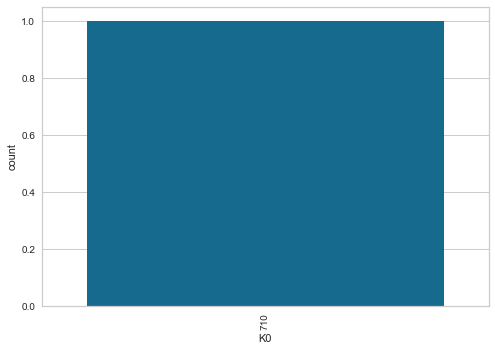

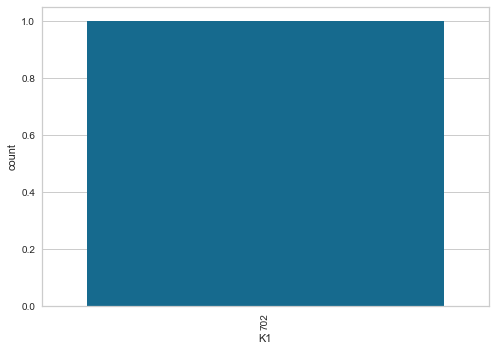

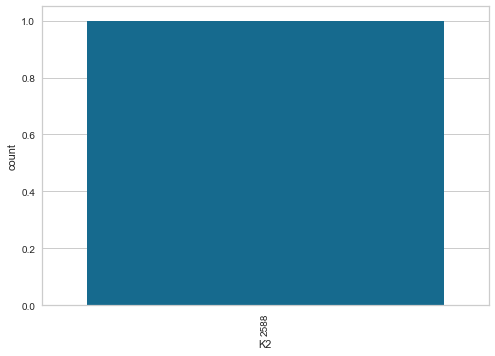

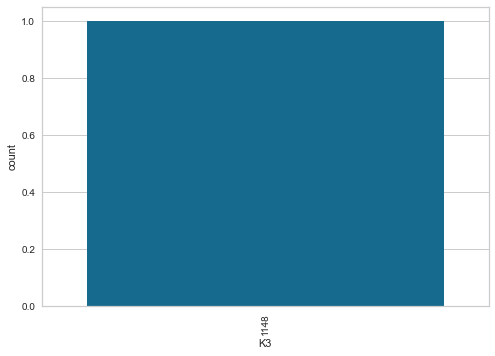

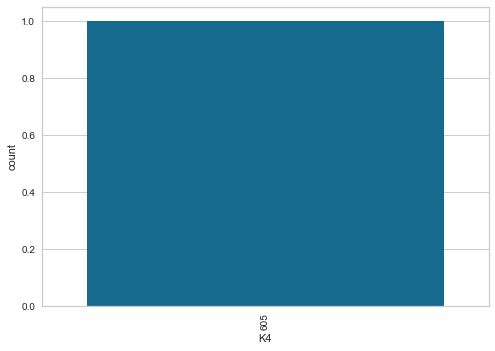

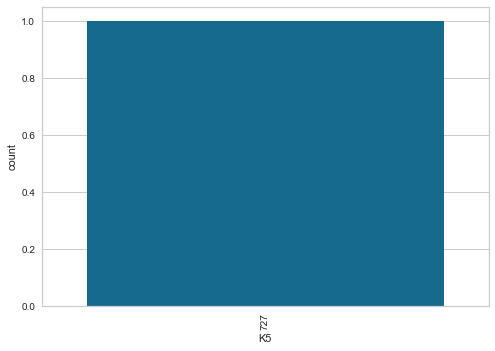

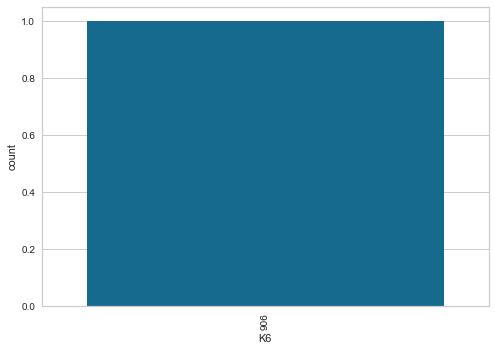

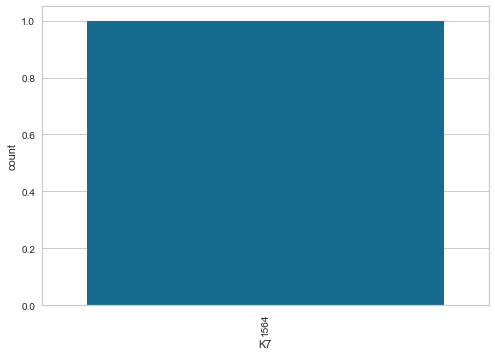

In [74]:
for i in new_df:
    sns.countplot(x=new_df[i])
    plt.xticks(rotation=90)
    plt.show()